# Honey Nut Clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import scipy
%matplotlib inline

In [2]:
# Read in file:
cereals = pd.read_csv('cereals.csv', na_values=-1)

In [3]:
# Replace NaN values with medians:
cereals.loc[(cereals['potass'].isnull()), "potass"] = cereals.potass.median()
cereals.loc[(cereals['sugars'].isnull()), "sugars"] = cereals.potass.median()
cereals.loc[(cereals['carbo'].isnull()), "carbo"] = cereals.potass.median()

In [4]:
# Normalize all columns to cups:
for column in cereals.ix[:, 3:12].columns:
    cereals[column] = cereals[column] * (1/ cereals['cups'])

In [5]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3,1,0.33
1,100%_Natural_Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3,1,1.00
2,All-Bran,K,C,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,1,0.50
4,Almond_Delight,R,C,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,120.000000,33.333333,3,1,0.75


In [6]:
# Just for later:
names = cereals.name.get_values()

In [7]:
# Let's just look at the columns we want for now:
cereals = cereals[['calories','protein', 'fat', 'sodium', 'fiber', 'carbo',
                  'sugars', 'potass', 'vitamins', 'weight', 'cups']]

In [8]:
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,1,0.33
1,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,1,1.00
2,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,1,0.33
3,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,1,0.50
4,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,120.000000,33.333333,1,0.75


In [9]:
#PCA Stuff to create the data for our cluster graphs:
pca = PCA(n_components=2)
pca.fit(cereals)
reduced_X = pca.transform(cereals)

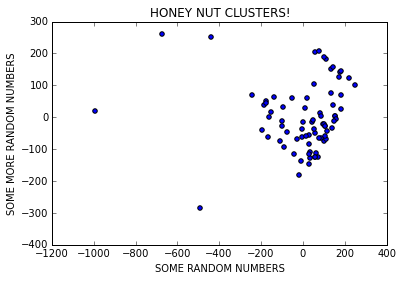

In [10]:
# Here is our first cluster graph:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
plt.title("HONEY NUT CLUSTERS!")
plt.xlabel("SOME RANDOM NUMBERS")
plt.ylabel("SOME MORE RANDOM NUMBERS")
plt.show()

In [11]:
#Now let's do the KMeans stuff and get our y-pred!
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_X)

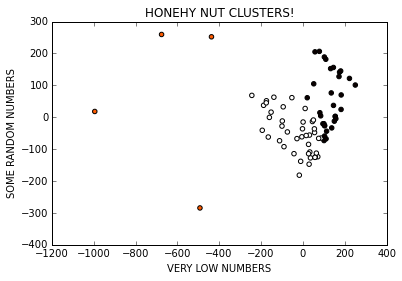

In [12]:
# Create a new graph with our y_pred and color mapping:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred, cmap="hot")
plt.title("HONEHY NUT CLUSTERS!")
plt.xlabel("VERY LOW NUMBERS")
plt.ylabel("SOME RANDOM NUMBERS")
plt.show()

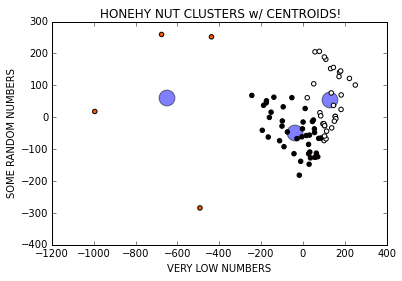

In [13]:
# Take a look at our centroids!
kmeans2 = KMeans(3)
labels = kmeans2.fit_predict(reduced_X)


plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap="hot")
plt.title("HONEHY NUT CLUSTERS w/ CENTROIDS!")
plt.xlabel("VERY LOW NUMBERS")
plt.ylabel("SOME RANDOM NUMBERS")
plt.show()

In [14]:
# Lets put our new found groups together with their names in a new data frame!
new_data = list(zip(names, y_pred))
cereals_group = pd.DataFrame(new_data)

In [15]:
cereals_group.head()

,0,1
0,100%_Bran,1
1,100%_Natural_Bran,0
2,All-Bran,1
3,All-Bran_with_Extra_Fiber,1
4,Almond_Delight,2


In [16]:
# Now lets join the new group numbers back to the data frame!
new_cereals = cereals.join(cereals_group)

In [17]:
# We are going to drop the extra name column:
new_cereals.drop([0], 1, inplace=True)
# and rename column 1 to groups:
new_cereals.rename(columns={1: 'groups'}, inplace=True)

In [18]:
new_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,groups
0,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,1,0.33,1
1,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,1,1.00,0
2,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,1,0.33,1
3,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,1,0.50,1
4,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,120.000000,33.333333,1,0.75,2


In [19]:
# Now lets create some dataframes based on the group they are in:
cereals_group_0 = new_cereals[new_cereals['groups'] == 0]
cereals_group_1 = new_cereals[new_cereals['groups'] == 1]
cereals_group_2 = new_cereals[new_cereals['groups'] == 2]
# cereals_group_3 = new_cereals[new_cereals['groups'] == 3]
# cereals_group_4 = new_cereals[new_cereals['groups'] == 4]

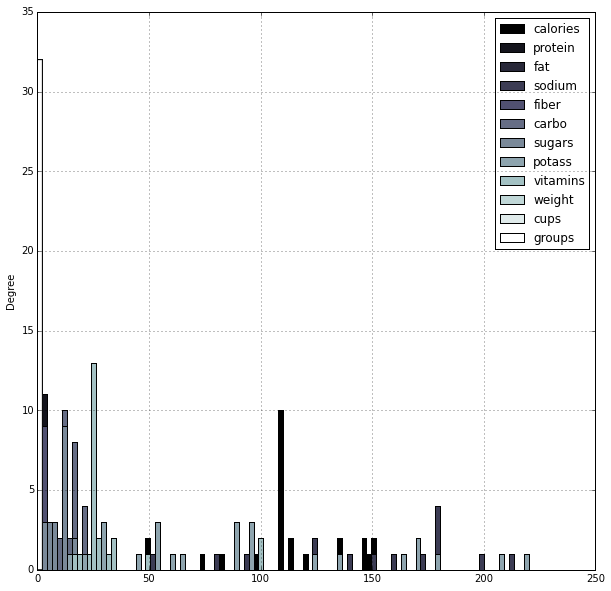

In [20]:
# Lets graph the groups and see what kind of info we are looking at here!
cereals_group_0.plot(kind='hist', bins=100, figsize=(10,10), cmap='bone')

In [21]:
# Let's create a pivot table of our groups to get a better idea of how they may be grouped.
new_cereals_pivot = new_cereals.pivot_table(columns='groups')

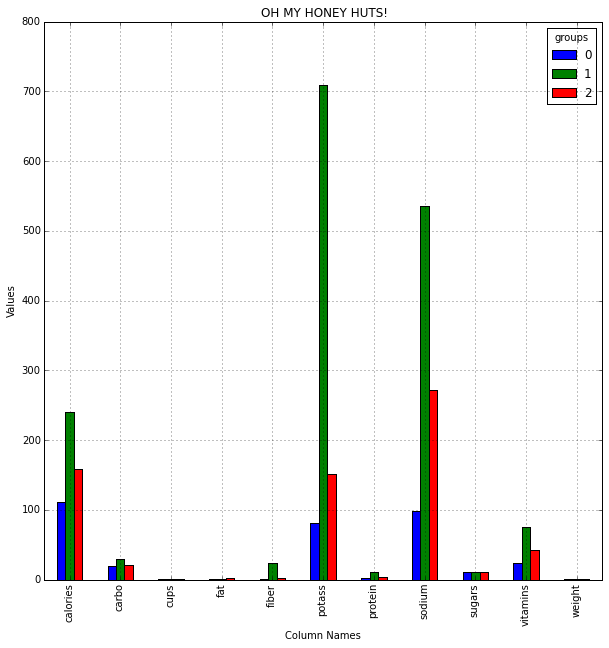

In [22]:
# OH MY HONEY NUTS what a great pivot table
new_cereals_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('OH MY HONEY HUTS!')
plt.show()

In [23]:
# Lets see what pivot tables of our groups will tell us.
cereals_group_0_pivot = cereals_group_0.pivot_table(columns='groups')

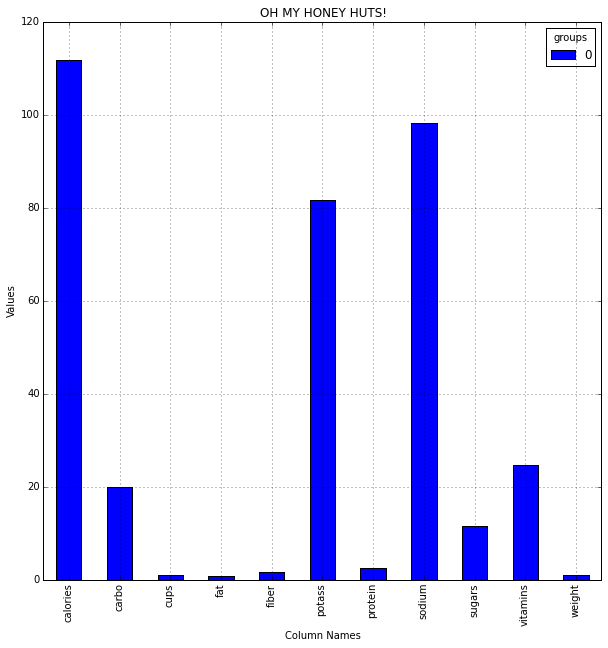

In [24]:
# Group 0
cereals_group_0_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('OH MY HONEY HUTS!')
plt.show()

In [28]:
cereals_group_1_pivot = cereals_group_1.pivot_table(columns='groups')

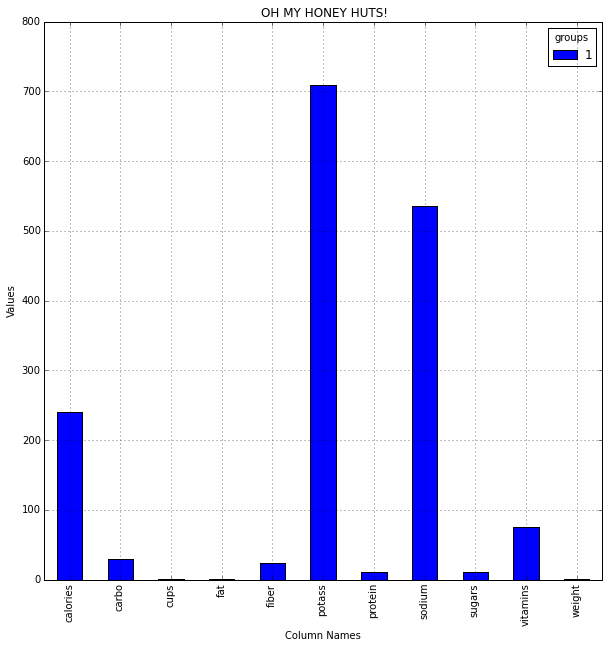

In [29]:
# Group 1
cereals_group_1_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('OH MY HONEY HUTS!')
plt.show()

In [30]:
cereals_group_2_pivot = cereals_group_2.pivot_table(columns='groups')

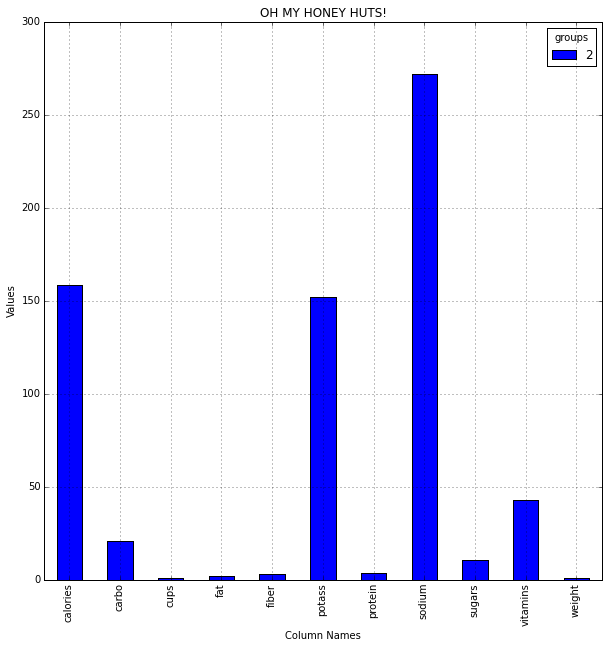

In [31]:
# Group 2
cereals_group_2_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('OH MY HONEY HUTS!')
plt.show()

# So when we cluster by 3 sodium content is the main thing in all three groups that are being compared. Calories and Potassium are the other 2 units that the clusters are grouping on

# Now lets take a look at clusters of 5. Will the groups still be clustered on the same data? will we have more than 3 main points to our groups? LET'S FIND OUT!

In [33]:
# So lets set our KMeans to 5 and fit_predict it:
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(reduced_X)

In [34]:
# Lets put our new found groups together with their names in a new data frame!
new_data = list(zip(names, y_pred))
cereals_group = pd.DataFrame(new_data)

In [35]:
new_cereals = cereals.join(cereals_group)

In [37]:
# We are going to drop the extra name column:
new_cereals.drop([0], 1, inplace=True)
# and rename column 1 to groups:
new_cereals.rename(columns={1: 'groups'}, inplace=True)

In [38]:
# Now lets create some dataframes based on the group they are in:
cereals_group_0 = new_cereals[new_cereals['groups'] == 0]
cereals_group_1 = new_cereals[new_cereals['groups'] == 1]
cereals_group_2 = new_cereals[new_cereals['groups'] == 2]
cereals_group_3 = new_cereals[new_cereals['groups'] == 3]
cereals_group_4 = new_cereals[new_cereals['groups'] == 4]

In [40]:
# Let's create a pivot table of our groups to get a better idea of how they may be grouped.
new_cereals_pivot = new_cereals.pivot_table(columns='groups')

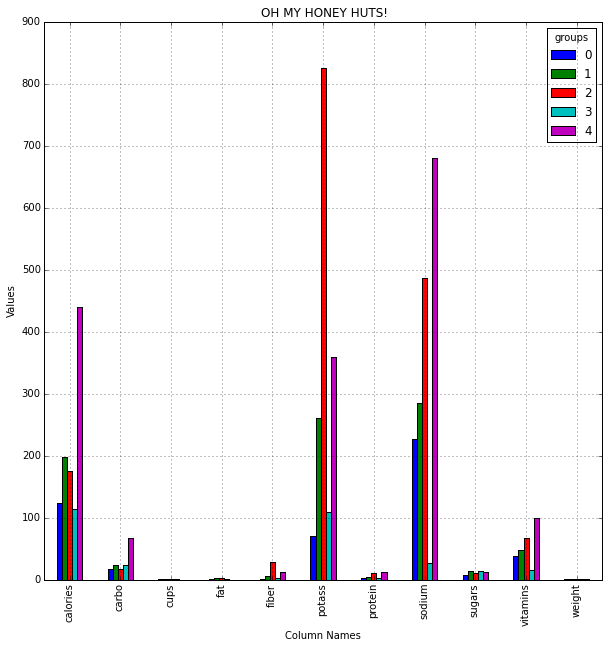

In [41]:
# OH MY HONEY NUTS what a great pivot table
new_cereals_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('OH MY HONEY HUTS!')
plt.show()

In [42]:
# Let's just create all our pivot tables here
cereals_group_0_pivot = cereals_group_0.pivot_table(columns='groups')
cereals_group_1_pivot = cereals_group_1.pivot_table(columns='groups')
cereals_group_2_pivot = cereals_group_2.pivot_table(columns='groups')
cereals_group_3_pivot = cereals_group_3.pivot_table(columns='groups')
cereals_group_4_pivot = cereals_group_4.pivot_table(columns='groups')

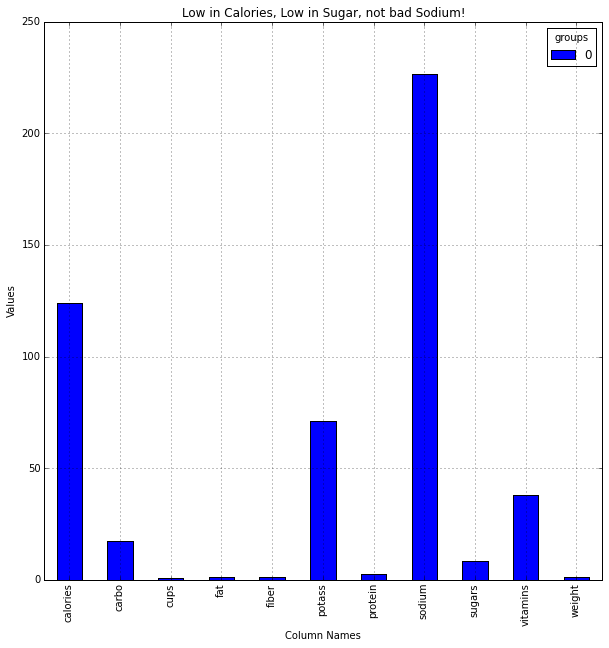

In [50]:
cereals_group_0_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('Low in Calories, Low in Sugar, not bad Sodium!')
plt.show()

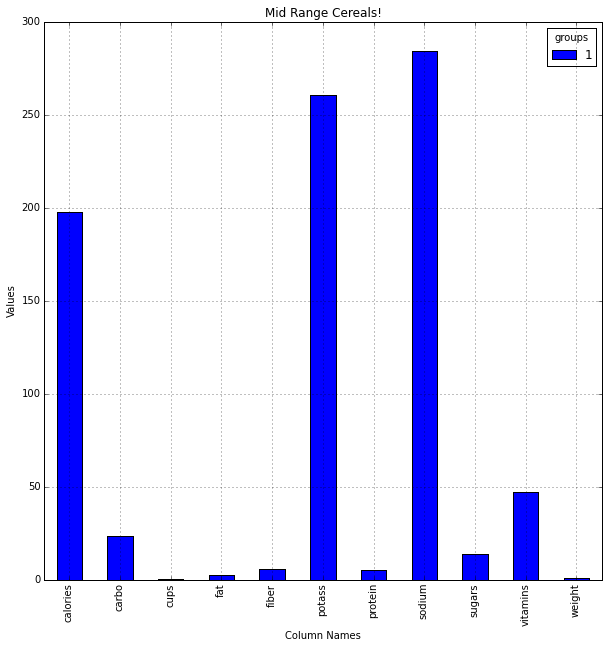

In [52]:
cereals_group_1_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('Mid Range Cereals!')
plt.show()

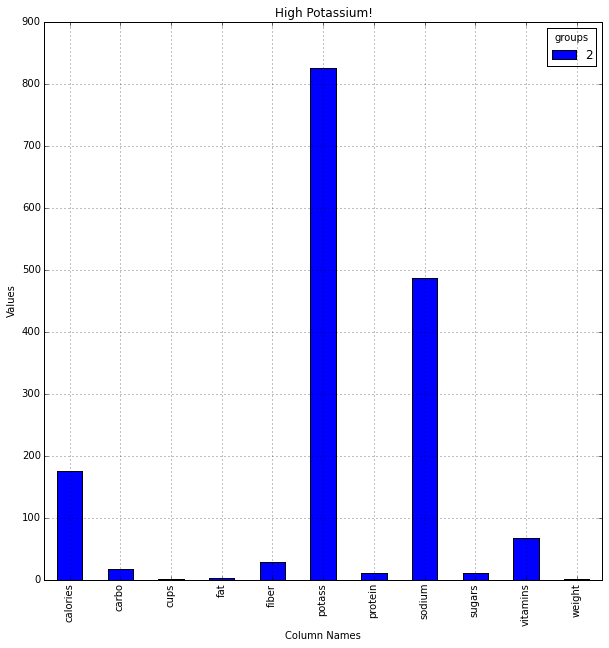

In [49]:
cereals_group_2_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('High Potassium!')
plt.show()

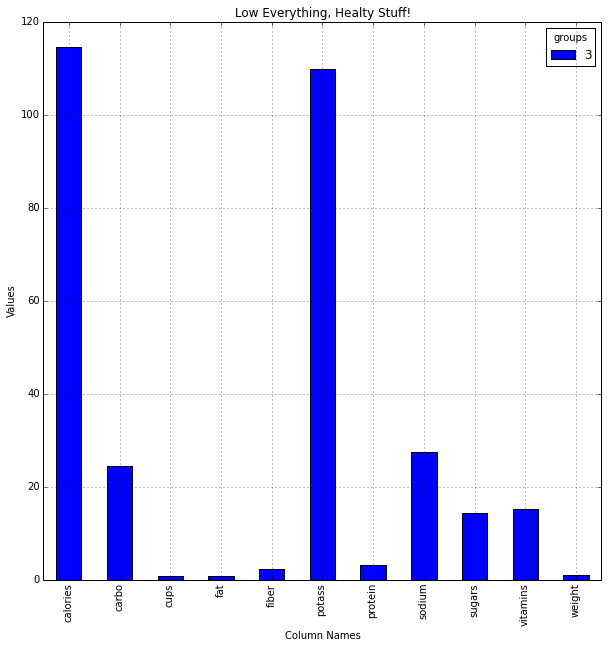

In [51]:
cereals_group_3_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('Low Everything, Healty Stuff!')
plt.show()

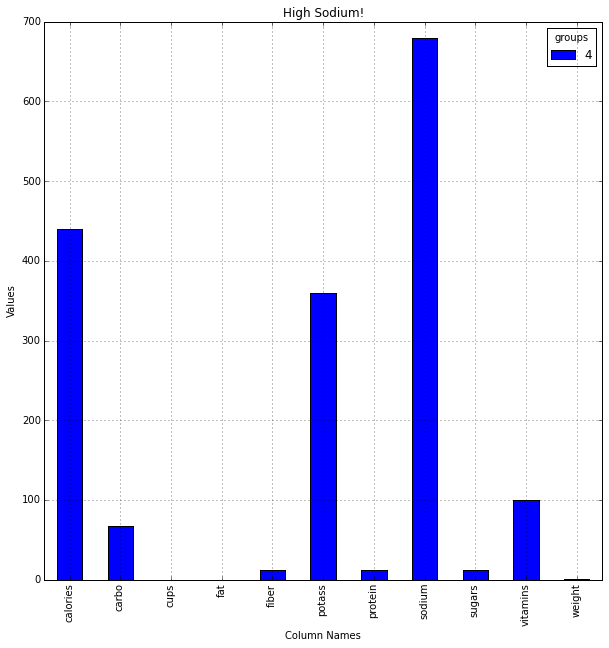

In [48]:
cereals_group_4_pivot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('High Sodium!')
plt.show()

# Well will you look at that! even when you jump up to 5 clusters, it is still grouping by the same main 3 columns but by adding the 2 additional clusters, it was able to narrow things down a little further using vitamins as well as carbs!

##### Graph names indicate major value of each grouping